In [58]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv("iris.csv")

In [62]:
data.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

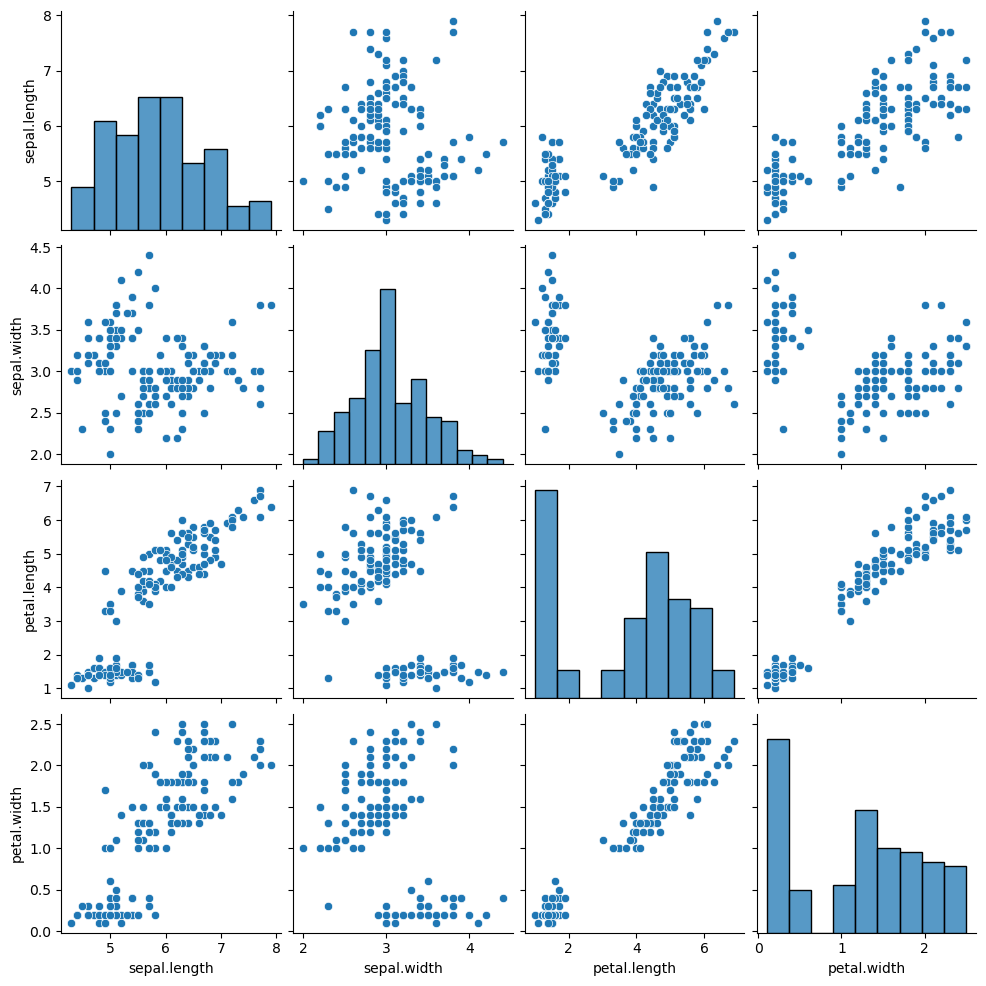

In [95]:
# plotting the curves
sns.pairplot(data)
plt.show()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


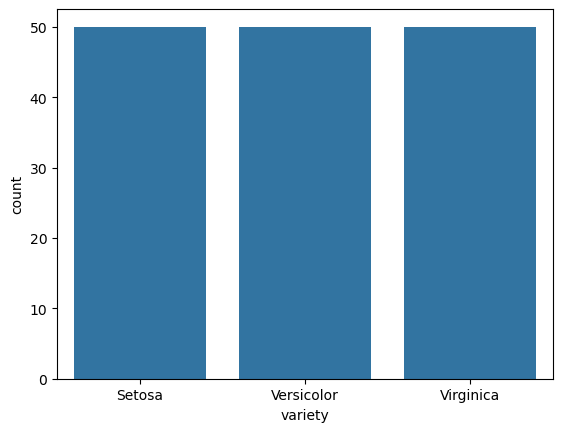

In [93]:
# check class distribution
print(data['variety'].value_counts())

sns.countplot(x='variety', data=data)

plt.show()


In [110]:
#Seperating IV and DV
X = data.iloc[:,:4]
y = data['variety']

In [112]:
#Splitting dataset in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [114]:
X_train

sepal.length  sepal.width  petal.length  petal.width
136           6.3          3.4           5.6          2.4
66            5.6          3.0           4.5          1.5
106           4.9          2.5           4.5          1.7
146           6.3          2.5           5.0          1.9
1             4.9          3.0           1.4          0.2
..            ...          ...           ...          ...
140           6.7          3.1           5.6          2.4
124           6.7          3.3           5.7          2.1
61            5.9          3.0           4.2          1.5
112           6.8          3.0           5.5          2.1
0             5.1          3.5           1.4          0.2

[112 rows x 4 columns]

In [116]:
X_test

sepal.length  sepal.width  petal.length  petal.width
3             4.6          3.1           1.5          0.2
5             5.4          3.9           1.7          0.4
45            4.8          3.0           1.4          0.3
69            5.6          2.5           3.9          1.1
125           7.2          3.2           6.0          1.8
23            5.1          3.3           1.7          0.5
53            5.5          2.3           4.0          1.3
51            6.4          3.2           4.5          1.5
55            5.7          2.8           4.5          1.3
97            6.2          2.9           4.3          1.3
120           6.9          3.2           5.7          2.3
58            6.6          2.9           4.6          1.3
90            5.5          2.6           4.4          1.2
67            5.8          2.7           4.1          1.0
46            5.1          3.8           1.6          0.2
72            6.3          2.5           4.9          1.5
77            6.7          3.0           5.0          1.7
41            4.5          2.3           1.3          0.3
56            6.3          3.3           4.7          1.6
111           6.4          2.7           5.3          1.9
123           6.3          2.7           4.9          1.8
94            5.6          2.7           4.2          1.3
50            7.0          3.2           4.7          1.4
133           6.3          2.8           5.1          1.5
60            5.0          2.0           3.5          1.0
92            5.8          2.6           4.0          1.2
119           6.0          2.2           5.0          1.5
130           7.4          2.8           6.1          1.9
139           6.9          3.1           5.4          2.1
59            5.2          2.7           3.9          1.4
38            4.4          3.0           1.3          0.2
105           7.6          3.0           6.6          2.1
83            6.0          2.7           5.1          1.6
135           7.7          3.0           6.1          2.3
147           6.5          3.0           5.2          2.0
75            6.6          3.0           4.4          1.4
8             4.4          2.9           1.4          0.2
113           5.7          2.5           5.0          2.0

In [118]:
y_train

136     Virginica
66     Versicolor
106     Virginica
146     Virginica
1          Setosa
          ...    
140     Virginica
124     Virginica
61     Versicolor
112     Virginica
0          Setosa
Name: variety, Length: 112, dtype: object

In [120]:
y_test

3          Setosa
5          Setosa
45         Setosa
69     Versicolor
125     Virginica
23         Setosa
53     Versicolor
51     Versicolor
55     Versicolor
97     Versicolor
120     Virginica
58     Versicolor
90     Versicolor
67     Versicolor
46         Setosa
72     Versicolor
77     Versicolor
41         Setosa
56     Versicolor
111     Virginica
123     Virginica
94     Versicolor
50     Versicolor
133     Virginica
60     Versicolor
92     Versicolor
119     Virginica
130     Virginica
139     Virginica
59     Versicolor
38         Setosa
105     Virginica
83     Versicolor
135     Virginica
147     Virginica
75     Versicolor
8          Setosa
113     Virginica
Name: variety, dtype: object

In [128]:
# feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [136]:
# apply k nearest to the neighbors
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred_knn = knn3.predict(X_test)

In [140]:
# claculating the accuracy
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
print(acc_knn)

0.868


In [148]:
y_pred = knn3.predict(X_test)


In [164]:
#Finding the optimim value of k
k_range  = range(3,21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
    scores.append(acc_knn)

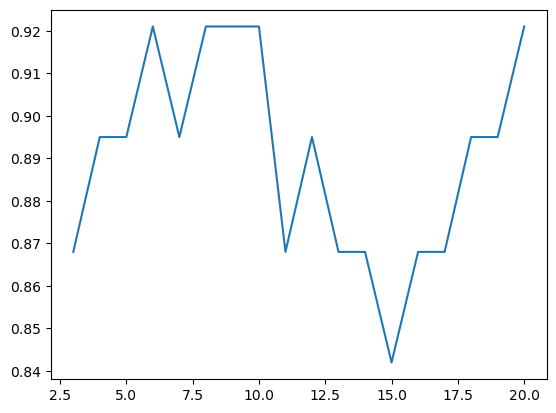

In [166]:
plt.plot(k_range, scores)
plt.show()

In [168]:
# apply k nearest to the neighbors
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=6)
knn3.fit(X_train, y_train)
y_pred_knn = knn3.predict(X_test)

In [170]:
#Calculating the accuracy
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
print('KNN Accuracy: '+ str(round(acc_knn,3)))

KNN Accuracy: 0.921


In [172]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvs_knn = cross_val_score(knn,X,y,cv=10).mean()
print('Cross Val Score : '+ str(round(cvs_knn,3)))

Cross Val Score : 0.98
